#Gender bias
This code examines gender bias in discussions between two tv shows two shows. Word embedding models are trained for both shows.

! Prior note: I used Google Colab to answer this question.
              This code has been constructed as a learning exercise.
This code is guided by: 
https://jveerbeek.gitlab.io/data-mining/ &
https://github.com/melvinwevers/historical_concepts/blob/master/notebook/Gender_final.ipynb 


Definition of the goal: compare the gender bias in the discussions between two shows. 

In [ ]:
#load data
import pickle
import pandas as pd

df = pd.read_pickle("discussions.p")
df #consists of columns title, type, year, post

eng_words = pd.read_pickle("word_cats.p")
eng_words

,affect,posemo,negemo,social,family,cogproc,percept,body,work,leisure,money,relig,occupation
0,protesting,incentive,destruction,chick,ma's,comply,squeez,pussy,dotcom,dnd,portfolio,goddess,accountant
1,pretty,luck,beaten,ma's,niece,luck,sand,wears,employee,vacation,sale,karma,actor
2,sighs,freeing,battl,lets,stepkid,unquestion,moist,hearts,paper,hobb,stores,pastor,actress
3,warmth,pretty,protesting,son's,son's,pretty,warmth,asleep,earns,band,bets,temple,actuary
4,mooch,nicely,dumber,daddies,daddies,become,gloomy,gums,assign,skat,bank,holy,acupuncturist
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,ty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1391,undesir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1392,trembl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1393,weaken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#choose two shows
print(df.title.value_counts())

Game of Thrones            15462
Breaking Bad                6424
Better Call Saul            5268
Black Mirror                4720
Stranger Things             2891
True Detective              2721
Twin Peaks                  2399
Dark                        2004
Ozark                       1417
Mr. Robot                   1347
Orange is the New Black     1208
The Witcher                 1188
Fargo                        680
Mindhunter                   657
The Newsroom                 484
Succession                   389
The Crown                    338
House of Cards               158
La Casa de Papel             150
The Mandelorian               95
Name: title, dtype: int64


#Motivation of the shows (and why its relevant in the context of gender bias)
I decided to look at Orange Is the New Black and Breaking Bad.
Both are categorized as drama and crime series.
The difference is that the main characters from Orange Is the New Black are woman and the main character from Breaking Bad is a man. 

Hypothesis:
I expect to see that the discussion about Orange Is the new black will bias a set of words to be female related. While I expect the Breaking Bad to bias a set of words to be more male related.  

In [ ]:
#Train two word embeddings (one for each show)
orange_black = df[(df.title=="Orange is the New Black")]
breaking_bad = df[(df.title=="Breaking Bad")]

In [ ]:
#Orange Is the New Black - Pre-processing
from tqdm import tqdm_notebook
import spacy
#process the values in the post column of our dataframe
posts = orange_black.post.values
nlp = spacy.load("en_core_web_sm")
processed_texts = [text for text in tqdm_notebook(nlp.pipe(posts, 
                                              n_process=-1, 
                                              disable=["ner",
                                                       "parser"]),
                                          total=len(posts
                                                   ))]

tokenized_text_orange_black = [[word.lemma_.lower() for word in processed_texts if word.pos_ == 'VERB' or word.pos == "ADJ" or word.pos_ == "NOUN" or word.pos_ == "PROPN"] for processed_texts in processed_texts];

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


  0%|          | 0/1208 [00:00<?, ?it/s]

[['maria', 'steal', 'piper', 'business', 'fuck', 'maria'], ['think', 'distract', 'suzanne', 'realize', 'do', 'force'], ['issue'], ['give', 'situation', 'could', 'do', 'eye', 'attack'], ['maritza', 'bartende', 'miami', 'watch', 'jane', 'virgin'], ['remember', 'say', 'boo', 'deserve', 'harass', 'will', 'argue', 'remember', 'say', 'bitch', 'would'], ['delete'], ['think', 'people', 'express', 'love', 'actor', 'character'], ['finish', 'season'], ['like', 'dude', 'will', 'find', 'keep', 'mind'], ['say', 'comment', 'day', 'finish', 'show'], ['can', 'confirm', 'time', 'may', 'seem', 'rape', 'let', 'hurt', 'shit', 'happen', 'year', 'feel', 'yesterday', 'would'], ['writer', 'set', 'daya', 'mom', 'get', 'start', 'have', 'other', 'look', 'daya', 'ignore', 'advice', 'give', 'care', 'favor', 'individual'], ['see', 'ya', 'fang', 'chomp', 'fuck'], ['agree', 'want', 'see', 'chapmans', 'story', 'conclude', 'engaging', 'think', 'prison', 'character', 'chapman', 'bookmark'], [], ['believe', 'claim', 'epis

In [ ]:
#Orange Is the New Black - Training word embeddings
import gensim
from gensim.models import Word2Vec

#I adjusted my settings to those of wevers example
SIZE = 300 
SG = 1 #we use skip-gram --> predict the neighbors of a word, wevers used this technique as well https://github.com/melvinwevers/historical_concepts/blob/master/code/making_embeddings_newspapers_new.py)
WINDOW = 10 
N_WORKERS = 10 
MIN_COUNT = 5

orange_black_model = Word2Vec(size=SIZE,
                sg=SG,
                window=WINDOW, 
                min_count=MIN_COUNT,
                workers=N_WORKERS)

orange_black_model.build_vocab(tokenized_text_orange_black)

orange_black_model.train(tokenized_text_orange_black,
           total_examples=model.corpus_count,
           epochs=model.epochs) 

orange_black_model.save("orange_black.model")

In [ ]:
#Breaking Bad - Pre-processing
from tqdm import tqdm_notebook
import spacy
#process the values in the post column of our dataframe
posts = breaking_bad.post.values
nlp = spacy.load("en_core_web_sm")
processed_texts = [text for text in tqdm_notebook(nlp.pipe(posts, 
                                              n_process=-1, 
                                              disable=["ner",
                                                       "parser"]),
                                          total=len(posts
                                                   ))]

tokenized_text_breaking_bad = [[word.lemma_.lower() for word in processed_texts if word.pos_ == 'VERB' or word.pos == "ADJ" or word.pos_ == "NOUN" or word.pos_ == "PROPN"] for processed_texts in processed_texts];

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


  0%|          | 0/6424 [00:00<?, ?it/s]

[['gt;mike', 'granddaughter'], ['thank', 'update'], ['thing', 'need', 'wildcard', 'jesse', 'can', 'control', 'liability', 'thing', 'weigh', 'gus', 'mind', 'will', 'walt', 'point', 'gus', 'walt', 'discussion', 'gus', 'could', 'convince', 'walt', 'way', 'handle', 'situation', 'walt', 'would', 'struggle', 'agree'], ['think', 'doubt', 'walt', 'poison', 'brock', 'lily', 'valley'], ['note', 'watch'], ['pay'], ['mike', 'banker', 'say', 'refer', 'shelf'], ['word', 'will', 'cause', 'downfall', 'kid', 'say', 'thing', 'add', 'point'], ['http://media.tumblr.com/tumblr_lvkdcx1b4u1qg63k7.gif'], ['course', 'think', 'kid', 'dirt', 'bike', 'time', 'frame', 'location', 'disappear', 'could', 'sync', 'robbing', 'train', 'boy', 'parent', 'know', 'area', 'dirt', 'biking', 'news', 'could', 'report', 'go', 'miss', 'train', 'track', 'train', 'conductor', 'engineer', 'report', 'happen', 'whole', 'stop', 'train', 'fit', 'time', 'location', 'boy', 'disappear', 'could', 'link', 'reason', 'boy', 'disappear', 'witne

In [ ]:
#Breaking Bad - Training word embeddings
import gensim
from gensim.models import Word2Vec

#I adjusted my settings to those of wevers example
SIZE = 300
SG = 1 # we use skip-gram --> predict the neighbors of a word, wevers used this technique as well https://github.com/melvinwevers/historical_concepts/blob/master/code/making_embeddings_newspapers_new.py)
WINDOW = 10 
N_WORKERS = 10 
MIN_COUNT = 5

breaking_bad_model = Word2Vec(size=SIZE,
                sg=SG,
                window=WINDOW, 
                min_count=MIN_COUNT,
                workers=N_WORKERS)

breaking_bad_model.build_vocab(tokenized_text_breaking_bad)

breaking_bad_model.train(tokenized_text_breaking_bad,
           total_examples=model.corpus_count,
           epochs=model.epochs) 

breaking_bad_model.save("breaking_bad.model")

In [ ]:
#Compile a list of male and female related words (relevant for corpus)
#print(eng_words.social.unique(),eng_words.family.unique()) --> i picked male and female words from these categories
male_words = ['son','daddy','male','granddad','his','masculinity','boyhood','king','boyfriend','bro','boy','mr','men','boyish','ex-bf','he','grandson','uncle','monsieur','brother','sir','papa','dad','stepdad','husband','bachelor','him','pa','cowboy','gentleman','gentleman',
              'mister']
female_words = ['chick','ma','bachelorette','gf','lesbian','exwife','princess','sugarmom','granny','mother','sister','her','mrs','queen','feminine','girl','mom','godmother','mam','wife','woman','nana','she','aunt','bride','mum','lady','dame','sis','cowgirl']

In [ ]:
#Get the mean embeddings of these words
import numpy as np

#for male and female words: first, check if the word is in the vocabulary. then, calculate the mean vector

male_words = [word for word in male_words if word in model.wv.vocab] 
male_mean_embedding = np.mean([model.wv[word] for word in male_words], axis=0)
print(male_mean_embedding.shape)

female_words = [word for word in female_words if word in model.wv.vocab] 
female_mean_embedding = np.mean([model.wv[word] for word in female_words], axis=0)
print(female_mean_embedding.shape)

(300,)
(300,)


In [ ]:
#create an embedding for the category affect
affect = eng_words.affect.values
affect = [word for word in affect if word in model.wv.vocab];

['trust', 'damn', 'piss', 'please', 'guilt', 'party', 'murder', 'suck', 'kind', 'freak', 'emotion', 'truth', 'poison', 'crap', 'vomit', 'idiot', 'treat', 'calm', 'fuckin', 'pain', 'enemy', 'pest', 'weapon', ':)', 'hope', 'miss', 'share', 'regret', 'haha', 'ruin', 'hurt', 'rape', 'bitch', 'risk', 'shame', 'bastard', 'shit', 'peace', 'pride', 'save', 'destroy', 'scare', 'attack', 'hazard', 'steal', 'disagree', 'fun', 'hug', 'lol', 'threat', 'worry', 'fucker', 'shock', 'scream', 'avoid', 'mess', 'lose', 'kill', 'safety', 'hell', 'rage', 'dump', 'cut', 'surprise', 'joke', 'bad', 'fight', 'bother', 'win', 'play', 'evil', 'fuck', 'fail', 'create', 'laugh', 'fear', 'agree', 'credit', 'abandon', 'war', 'trick', 'asshole', 'support', 'problem', 'yell', 'cry', 'interest', 'doubt', 'thank', 'love', 'harm', 'enjoy', 'danger', 'accept', 'care', 'villain', 'defend', 'obsess', 'hate', 'ignore', 'respect', 'screw', 'shake', 'assault', 'value', 'fake', 'low', 'tension']


In [ ]:
#packages
import matplotlib.pyplot as plt
#!pip install unidecode
import unidecode
import re
import pandas as pd
import pymc3 as pm
from helper import *

In [ ]:
#Compare the gender bias between the discussion on the two shows (use method Wevers) --> I use more notations with the code to show my understanding of Wevers method.
import random
import numpy as np
from scipy.spatial import distance

def plot_differences(male, female, model, category):
    #check if the words are in the vocabulary
    category = [word for word in category if word in model.wv.vocab]
    #create two lists (one for each vector & calculate distances)
    x = []
    y = []
    for word in category:
        #calculate the distance between word and mean embedding male within category affect
        x.append(distance.euclidean(model[word], male))
        #calculate the distance between word and mean embedding female within the category affect
        y.append(distance.euclidean(model[word], female))
    # calculate the gender bias by substracting x(male) - y(female)
    C = [x_ - y_ for x_, y_ in zip(x, y)]
    print(C)
    #create a plot with 20 random tokens
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.xlabel('distance to male')
    plt.ylabel('distance to female')
    plt.ylim(min(y) - 0.05, max(y) + 0.05)
    plt.xlim(min(y) - 0.05, max(y) +0.05)
    top_idx = random.sample(list(np.argsort(C)[-50:]), 20)
    bottom_idx = random.sample(list(np.argsort(C)[:50]), 20)
    for i, label in enumerate(category):
        if i in top_idx or i in bottom_idx:
            ax.annotate(label, (x[i], y[i]))
    ax.plot([min(y) -0.05, max(x) +0.15], [min(y) -0.05, max(x) + 0.05], ls="--", c=".3")

    return C, top_idx

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


[-0.000700831413269043, -0.0009301900863647461, -0.0005502700805664062, -0.0007685422897338867, -0.0006433725357055664, -0.0005918741226196289, -0.0008159875869750977, -0.000527501106262207, -0.000603795051574707, -0.000626683235168457, -0.0008332729339599609, -0.0003718137741088867, -0.0006668567657470703, -0.0011137723922729492, -0.0015326738357543945, -0.0010182857513427734, -0.0009008646011352539, -0.0005545616149902344, -0.0005667209625244141, -0.000573277473449707, -0.000423431396484375, -0.0007582902908325195, -0.0004134178161621094, -0.000664830207824707, -0.000630497932434082, -0.0007586479187011719, -0.0005230903625488281, -0.0007240772247314453, -0.0007129907608032227, -0.0009340047836303711, -0.0006483793258666992, -0.0006074905395507812, -0.0006600618362426758, -0.0006920099258422852, -0.0006431341171264648, -0.0009714365005493164, -0.0005263090133666992, -0.0006486177444458008]


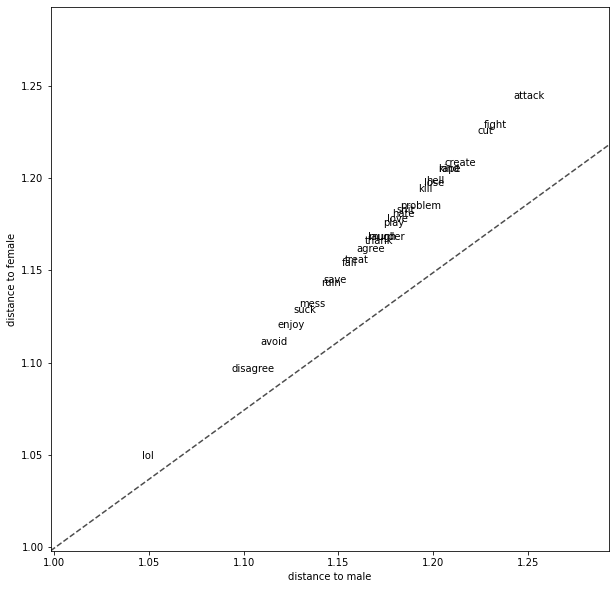

In [ ]:
plot_differences(male_mean_embedding, female_mean_embedding, orange_black_model, affect);


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


[0.0025766193866729736, 0.001351386308670044, 0.0024735629558563232, -0.001289457082748413, 0.0021536946296691895, 0.0021682381629943848, 0.0027882754802703857, 0.0018780231475830078, 0.0021986663341522217, 0.0022599995136260986, 0.00166359543800354, -0.0002766251564025879, 0.004921674728393555, 0.0019490718841552734, -0.0020293891429901123, 0.001861482858657837, 0.000957876443862915, -0.0014359652996063232, 0.0010931789875030518, 0.0013176500797271729, 0.00011494755744934082, 0.00212705135345459, 0.001161813735961914, -0.000955045223236084, 0.001925349235534668, 0.0029225051403045654, 0.002718120813369751, 0.002026468515396118, -0.0018062293529510498, 0.002411484718322754, 0.003003150224685669, -0.001986563205718994, -0.004137575626373291, 0.0029297173023223877, 0.0014503896236419678, 0.0015725791454315186, 0.000989675521850586, -0.0020905733108520508, 0.0014832913875579834, 0.003954976797103882, 0.0025392472743988037, 0.0020530223846435547, -0.0013986527919769287, 0.00178870558738708

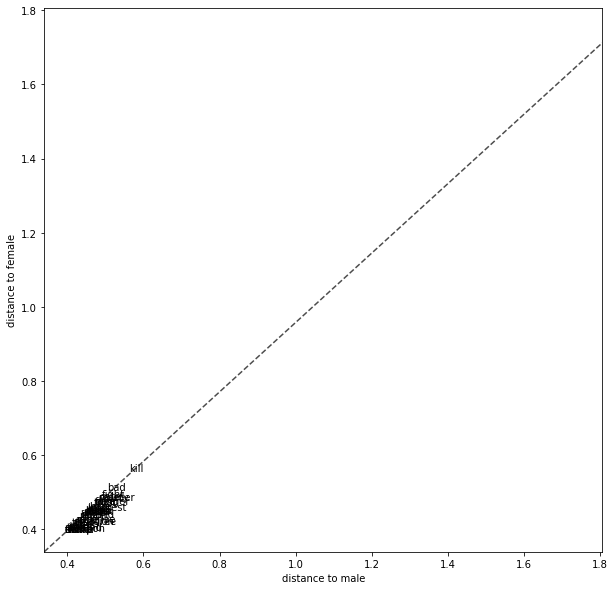

In [ ]:
plot_differences(male_mean_embedding, female_mean_embedding, breaking_bad_model, affect);

#Explaination of the results

**Results:**<br>
The results consist of two plots
The words shown in the plot are categorized as affect. The line in the middle of the plot divides the plot in words with a female bias (leftside of the plot) and words with a male bias (rightside of the plot). 

Both results underline the earlier hypthesis. All negetive words within C(gender bias) are words that have bias towards female bias. We see this pattern appear in the model of Orange Is the New Black. All positive words within C have a bias towards males. Most words in the set of Breaking Bad show positive values and therfore create a model with a bias towards males. Both models contain a gender bias. This means that both models are likely to create unfair predictions.

**Discussion:**<br>
In order to try and improve the results I could have added american names to the embeddings. This might create more distance between the line in the middle of the plot and the words. This would show an increase in the gender bias and therefore unmask some unmeasured confouders within the gender bias. 

An improvent could be make to obtain a better interpretable plot for the Breaking Bad model. The affective words cluster strongly together. This results in a plot with a low readability. A broader vocabulary could help reduce the clustering. The model would then calculate an increased distance between words as their context/meaning would be differ more. For this case, in which we want to see whether or not the post create models with a gender bias. The position of the words is more important than their actual readability.

